In [4]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
from sklearn.decomposition import PCA

In [7]:
from sklearn.preprocessing import StandardScaler

In [11]:
cancer =load_breast_cancer()

In [12]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [13]:
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)

In [15]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df.shape

(569, 30)

In [21]:
sc= StandardScaler()
X_sc=sc.fit_transform(df)

In [22]:
pca=PCA(2)
x_pca = pca.fit_transform(X_sc)

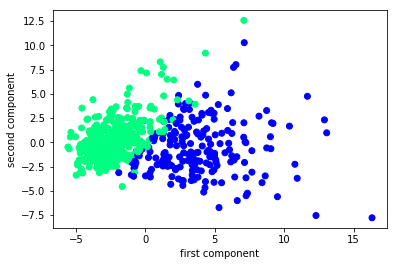

In [24]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='winter')
plt.xlabel('first component')
plt.ylabel('second component')
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [27]:
np.unique(cancer.target)

array([0, 1])

In [28]:
np.bincount(cancer.target)

array([212, 357], dtype=int64)

In [29]:
log_cv=cross_val_score(LogisticRegression(),x_pca,cancer.target,cv=5,scoring='recall')
svm_cv=cross_val_score(SVC(kernel='linear'),x_pca,cancer.target,cv=5,scoring='recall')

In [30]:
np.mean(log_cv)

0.9663928012519563

In [31]:
np.mean(svm_cv)

0.9635758998435054

In [35]:
pca_2=PCA(n_components=.95)
X_pca_new = pca_2.fit_transform(X_sc)

In [39]:
pca_2.n_components

0.95

In [37]:
svm_cv1=cross_val_score(SVC(gamma=.0001),X_pca_new,cancer.target,cv=5,scoring='recall')

In [38]:
np.mean(svm_cv1)

1.0